In [6]:
%pylab inline
from scipy.stats import gaussian_kde
import tensorflow as tf
from tensorflow.contrib.opt import ScipyOptimizerInterface
import pandas as pd
import simulate
from tensorflow.python.client import device_lib

print("Version: {}".format(tf.__version__))
print(device_lib.list_local_devices())

inFN = "test/big_data.csv"

Populating the interactive namespace from numpy and matplotlib
Version: 1.10.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13798092809775299416
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11272152679
locality {
  bus_id: 2
  numa_node: 1
  links {
  }
}
incarnation: 14763956071493850234
physical_device_desc: "device: 0, name: Tesla K40m, pci bus id: 0000:42:00.0, compute capability: 3.5"
]


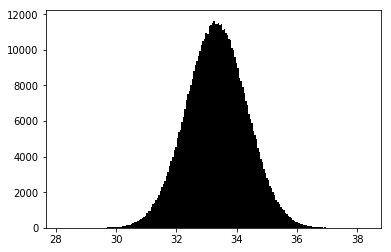

In [7]:
I = pd.read_csv(inFN)
_ = plt.hist(I['IOBS']/I['SIGMA(IOBS)'], 200, color='k')



6.90127671123968


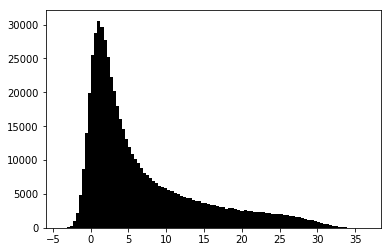

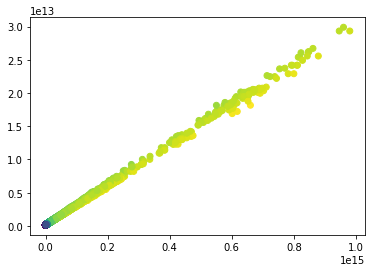

In [8]:
I['SIGMA(IOBS)'] = np.percentile(I['I'][I['I']>0.], 20) + 0.03*I['I']
I['IOBS'] = np.random.normal(I['I'], I['SIGMA(IOBS)'])

_=hist(I['IOBS'] / I['SIGMA(IOBS)'], 100, color='k')
print(np.mean(I['IOBS']/ I['SIGMA(IOBS)']))

figure()
plt.scatter(I['IOBS'], I['SIGMA(IOBS)'], c=I['IOBS']/I['SIGMA(IOBS)'])

In [9]:
I = pd.read_csv(inFN)

print("Number of reflection observations: {}".format(len(I)))
print("Multiplicity: {}".format(len(I)/len(I.groupby(['H', 'K', 'L']))))

#This removes reflections which were not observed in the 'on' and 'off' datasets at a given rotation
I = I.groupby(['H', 'K', 'L', 'RUN', 'PHINUMBER']).filter(lambda x: x.SERIES.str.contains('on').max() and x.SERIES.str.contains('off').max())

gammaobs = len(I.groupby(['H', 'K', 'L', 'RUN', 'PHINUMBER']))
gammamult = gammaobs / len(I.groupby(['H', 'K', 'L']))
print("Number of gamma observations: {}".format(gammaobs))
print("Multiplicity: {}".format(gammamult))

Number of reflection observations: 574280
Multiplicity: 8.996036781177061
Number of gamma observations: 138109
Multiplicity: 2.5422265581857673


In [10]:
import crystal

referenceData = "test/1ubq.pdb.hkl"
fcalcData     = "test/1ubq.pdb.hkl"
spacegroupnumber = 4
ipm_number = 2

R = crystal.crystal().read_hkl(referenceData)
fcalc = crystal.crystal().read_hkl(fcalcData)
R['PHASE'] = fcalc['PHASE']
R.spacegroup = spacegroupnumber
R.unmerge()

FOBS         PHASE          D  MERGEDH  MERGEDK  MERGEDL
H  K  L                                                                 
0   0 2    798.34300  1.800000e+02  14.475000        0        0        2
      4    184.11000  0.000000e+00   7.237500        0        0        4
      6    228.50800  1.800000e+02   4.825000        0        0        6
      8    437.72900  1.800000e+02   3.618750        0        0        8
      10    73.92960  0.000000e+00   2.895000        0        0       10
      12    69.75230  0.000000e+00   2.412500        0        0       12
      14    11.09190  1.800000e+02   2.067857        0        0       14
      16    83.00530  0.000000e+00   1.809375        0        0       16
      18   108.86400  1.800000e+02   1.608333        0        0       18
    1 1   1196.31000  9.000000e+01  23.974290        0        1        1
      2    333.68600 -9.000000e+01  13.711049        0        1        2
      3     85.52270  9.000000e+01   9.413372        0        1        3
      4    409.46300  9.000000e+01   7.136050        0        1        4
      5    250.16000 -9.000000e+01   5.737663        0        1        5
      6    144.78300  9.000000e+01   4.794587        0        1        6
      7    600.37000  9.000000e+01   4.116514        0        1        7
      8    159.91400  9.000000e+01   3.605866        0        1        8
      9     33.84710 -9.000000e+01   3.207608        0        1        9
      10   147.41300  9.000000e+01   2.888391        0        1       10
      11    47.01520  9.000000e+01   2.626850        0        1       11
      12   217.39700 -9.000000e+01   2.408671        0        1       12
      13   154.25000  9.000000e+01   2.223911        0        1       13
      14   105.11500  9.000000e+01   2.065445        0        1       14
      15   133.86100 -9.000000e+01   1.928038        0        1       15
      16    11.52860 -9.000000e+01   1.807758        0        1       16
      17    33.15270  9.000000e+01   1.701593        0        1       17
      18    10.33260  9.000000e+01   1.607197        0        1       18
      19    24.24270 -9.000000e+01   1.522718        0        1       19
    2 0    703.54900  1.800000e+02  21.385000        0        2        0
      1    169.24900 -3.334570e-14  17.200949        0        2        1
...              ...           ...        ...      ...      ...      ...
32 -7 4     18.11920  3.637340e+01   1.504050       32        7        4
   -8 0     64.90420  1.800000e+02   1.522927       32        8        0
      1     13.78330  1.428480e+02   1.520824       32        8        1
      2     40.38810 -7.426060e+01   1.514568       32        8        2
      3      7.23388 -1.164800e+02   1.504309       32        8        3
   -9 0     31.02190 -3.520730e-14   1.506775       32        9        0
      1     62.08990 -1.831690e+01   1.504738       32        9        1
33 -1 0      8.84839  9.000000e+01   1.539608       33        1        0
      1     71.34340  7.229040e+01   1.537435       33        1        1
      2     19.47540  1.155820e+02   1.530972       33        1        2
      3     34.26460 -1.761310e+02   1.520379       33        1        3
      4     51.93850  2.097740e+01   1.505911       33        1        4
   -2 0      6.56513 -9.000000e+01   1.536624       33        2        0
      1     15.32880  1.472640e+02   1.534464       33        2        1
      2     36.23460 -1.704650e+02   1.528038       33        2        2
      3     65.71040  8.647350e+01   1.517505       33        2        3
      4     47.14230 -9.793990e+01   1.503119       33        2        4
   -3 0     22.63120  9.000000e+01   1.531689       33        3        0
      1     37.02340 -3.759210e+01   1.529550       33        3        1
      2      4.48032  1.460880e+02   1.523185       33        3        2
      3     18.70480 -9.974990e+01   1.512752       33        3        3
   -4 0     71.28940 -9.000000e+01   1.524859       33        4        0
 

In [11]:
"""
#########################################################
It is important to establish some numerical indices in 
order to index arrays in the optimization problem. 

----------
GAMMAINDEX
----------
    A unique numeric index is assigned to each combination
    of H, K, and L. This index uses the "MERGEDH/K/L" 
    attributes in the dataframe. This way we don't estimate
    more gammas than are truly necessary. This should not be
    used for grouping observations to make ratiometric 
    observations, because it will group together equivalent
    observations in a single image should they exist. That
    would be problematic, because equivalent observations will
    certainly not have the same partiality.

--------
RUNINDEX
--------
    A unique, sequential identifier for each run/crystal.
    Use this for indexing per crystal parameters.

----------
IMAGEINDEX
----------
    A unique, sequential identifier for each image in the 
    dataset. Use this for adding per shot parameters. 

--------
PHIINDEX
--------
    A unique, sequential identifier for each group of shots
    on the same crystal at the same rotation angle. 


#########################################################
"""

indices = {
    'GAMMAINDEX' : ['MERGEDH', 'MERGEDK', 'MERGEDL'], 
    'RUNINDEX'   : 'RUN', 
    'IMAGEINDEX' : ['RUN', 'PHINUMBER', 'SERIES'],
    'PHIINDEX'   : ['RUN', 'PHINUMBER'],
}

for k,v in indices.items():
    I[k] = I.groupby(v).ngroup()

In [12]:
k = [i for i in I if 'ipm' in i.lower()]
k += ['RUNINDEX', 'Io']
imagemetadata = I[k + ['IMAGEINDEX']].groupby('IMAGEINDEX').mean()
imagemetadata 

,IPM_0,IPM_1,IPM_2,IPM_3,IPM_X,IPM_Y,IPM,RUNINDEX,Io
IMAGEINDEX,,,,,,,,,
0,0.782384,0.495686,0.783506,0.498735,-0.003066,-0.000717,2.560311,0,2.560311
1,0.534010,0.339646,0.533455,0.338238,0.002077,0.000520,1.745348,0,1.745348
2,0.455588,0.289014,0.455691,0.289684,-0.001158,-0.000113,1.489977,0,1.489977
3,2.561312,1.628945,2.565890,1.627089,0.000570,-0.000893,8.383236,0,8.383236
4,0.758740,0.482631,0.757830,0.480454,0.002261,0.000600,2.479655,0,2.479655
5,0.539087,0.343386,0.539897,0.341825,0.002278,-0.000751,1.764195,0,1.764195
6,0.522285,0.332798,0.523069,0.331057,0.002623,-0.000750,1.709208,0,1.709208
7,0.229693,0.145490,0.229460,0.146090,-0.002057,0.000509,0.750733,0,0.750733
8,0.245974,0.155906,0.245634,0.156290,-0.001228,0.000690,0.803804,0,0.803804


In [13]:
iobs        = I.pivot_table(values='IOBS', index=['H', 'K', 'L', 'RUNINDEX','PHIINDEX'], columns='SERIES', fill_value=np.NaN) 
imagenumber = I.pivot_table(values='IMAGEINDEX', index=['H', 'K', 'L', 'RUNINDEX', 'PHIINDEX'], columns='SERIES', fill_value=-1)
ion    = iobs[[i for i in iobs if  'on' in i]].sum(1) 
ioff   = iobs[[i for i in iobs if 'off' in i]].sum(1)
gammas = ion / ioff

gammaidx = I.pivot_table(values='GAMMAINDEX', index=['H', 'K', 'L', 'RUNINDEX','PHIINDEX'])
gammaidx = np.array(gammaidx).flatten()

sigma       = I.pivot_table(values='SIGMA(IOBS)', index=['H', 'K', 'L', 'RUNINDEX','PHIINDEX'], columns='SERIES', fill_value=np.NaN) 
sigmaion    = np.sqrt(np.square(iobs[[i for i in iobs if  'on' in i]]).sum(1))
sigmaioff   = np.sqrt(np.square(iobs[[i for i in iobs if 'off' in i]]).sum(1))
sigmagamma  = np.abs(gammas)*np.sqrt(np.square(sigmaion / ion) + np.square(sigmaioff / ioff))
mergingweights = (1. / np.array(sigmagamma, dtype=float32)) * ((1./np.array([(1./sigmagamma.iloc[gammaidx == i]).sum() for i in range(gammaidx.max() + 1)], dtype=float32))[gammaidx])

H = np.array(I.groupby('GAMMAINDEX').mean()['MERGEDH'], dtype=int)
K = np.array(I.groupby('GAMMAINDEX').mean()['MERGEDK'], dtype=int)
L = np.array(I.groupby('GAMMAINDEX').mean()['MERGEDL'], dtype=int)

FOBS = np.array(R.loc[zip(H, K, L), 'FOBS'])
FOBS[np.isnan(FOBS)] = 0

In [22]:
tf.reset_default_graph()
h = gammaidx.max() + 1

r = len(gammas.reset_index().groupby('RUNINDEX'))
runidx = np.array(imagemetadata['RUNINDEX'])

#We need two sparse tensors to map from Icryst estimates into the liklihood function. 
#First the 'on' shots
tmp = np.array(imagenumber[[i for i in imagenumber if 'on' in i]])
idx = np.vstack((np.indices(tmp.shape)[0][tmp >= 0], tmp[tmp >= 0])).T
onimageidx = tf.SparseTensor(idx, np.ones(len(idx), dtype=np.float32), (len(imagenumber), len(imagemetadata)))
onimageidx = tf.sparse_reorder(onimageidx)

#Now the 'off' shots
tmp = np.array(imagenumber[[i for i in imagenumber if 'off' in i]])
idx = np.vstack((np.indices(tmp.shape)[0][tmp >= 0], tmp[tmp >= 0])).T
offimageidx = tf.SparseTensor(idx, np.ones(len(idx), dtype=np.float32), (len(imagenumber), len(imagemetadata)))
offimageidx = tf.sparse_reorder(offimageidx)




#This one has weights
#Let us have a sparse matrix for averaging hkl observations
idx = np.vstack((
    gammaidx,
    np.arange(len(gammaidx), dtype=int), 
)).T
tshape = (
    gammaidx.max()+1,
    len(gammaidx), 
)
#vals = np.array((1./sigmagamma).groupby(['MERGEDH', 'MERGEDK', 'MERGEDL']), dtype=float32)[gammaidx] / np.array(sigmagamma, dtype=float32)
vals = mergingweights
mergingtensor = tf.SparseTensor(idx, vals, tshape)
mergingtensor = tf.sparse_reorder(mergingtensor)

"""
#Let us have a sparse matrix for averaging hkl observations
idx = np.vstack((
    gammaidx,
    np.arange(len(gammaidx), dtype=int), 
)).T
tshape = (
    gammaidx.max()+1,
    len(gammaidx), 
)
vals = np.array(1./np.bincount(gammaidx)[gammaidx], dtype=float32)
mergingtensor = tf.SparseTensor(idx, vals, tshape)
mergingtensor = tf.sparse_reorder(mergingtensor)
"""


#Constants 
raw_gammas = tf.constant(np.float32(gammas))
ipm        = tf.constant(np.float32(imagemetadata['Io']))
ipm_x      = tf.constant(np.float32(imagemetadata['IPM_X']))
ipm_y      = tf.constant(np.float32(imagemetadata['IPM_Y']))
F          = tf.constant(np.float32(FOBS))

#LCs for scaling IPM data
x_intercept   = tf.constant(imagemetadata.IPM_X.mean())
x_slope       = tf.constant(1./imagemetadata.IPM_X.std())
y_intercept   = tf.constant(imagemetadata.IPM_Y.mean())
y_slope       = tf.constant(1./imagemetadata.IPM_Y.std())
#ipm_slope     = tf.Variable(1.)
ipm_slope     = tf.constant(1.)
ipm_intercept = tf.Variable(0.)
#ipm_intercept = tf.constant(0.)

#Beam shape
#sigx          = tf.Variable(10.*(2**0.5))
sigx          = tf.constant(50.)
sigy          = tf.constant(50.)

#Crystal dimensions
xmin          = tf.Variable(-50.*np.ones(r, dtype=np.float32))
xmax          = tf.Variable( 50.*np.ones(r, dtype=np.float32))
ymin          = tf.Variable(-50.*np.ones(r, dtype=np.float32))
ymax          = tf.Variable( 50.*np.ones(r, dtype=np.float32))

#gammastimates
gamma         = tf.Variable(np.ones(h), dtype=np.float32)

beamx  = ipm_x * x_slope + x_intercept
beamy  = ipm_y * y_slope + y_intercept


Icryst = 0.25*(ipm_slope*ipm + ipm_intercept) * (
    tf.erf((tf.gather(xmin, runidx) - beamx)/sigx) - tf.erf((tf.gather(xmax, runidx) - beamx)/sigx)
    ) * (
    tf.erf((tf.gather(ymin, runidx) - beamy)/sigy) - tf.erf((tf.gather(ymax, runidx) - beamy)/sigy)
    )

Bon  = tf.squeeze(tf.sparse_tensor_dense_matmul( onimageidx, tf.expand_dims(Icryst, 1)))
Boff = tf.squeeze(tf.sparse_tensor_dense_matmul(offimageidx, tf.expand_dims(Icryst, 1)))


#g = tf.maximum(raw_gammas*Boff/Bon, 0.)
#g = raw_gammas*Boff/(Bon + epsilon)
g = tf.squeeze(tf.sparse_tensor_dense_matmul(mergingtensor, tf.expand_dims(raw_gammas*Boff/(Bon), 1)))
#deltaF = tf.sqrt(g) - 1.
deltaFoverF = (tf.sqrt(g) - 1.)
#deltaFoverF = tf.squeeze(tf.sparse_tensor_dense_matmul(mergingtensor, tf.expand_dims(deltaFoverF_unmerged, 1)))
deltaF = F*deltaFoverF
loss = tf.reduce_sum(tf.abs(deltaFoverF))


In [53]:
#tf.gradients(loss, tf.gather(xmax, 0))
#tf.hessians(loss, [xmin, xmax, ymin, ymax, ipm_intercept])
#tf.hessians(loss, [xmax, ymax])
tf.gradients(tf.gradients(loss, xmin)[0], xmax)

AttributeError: 'IndexedSlices' object has no attribute 'value_index'

0: 3948.078857421875
10: 1268.6837158203125
20: 1268.43798828125
30: 1268.191162109375
40: 1267.9342041015625
50: 1267.666259765625
60: 1267.38427734375
70: 1267.0948486328125
80: 1266.79296875
90: 1266.4757080078125
100: 1266.156982421875


No handles with labels found to put in legend.


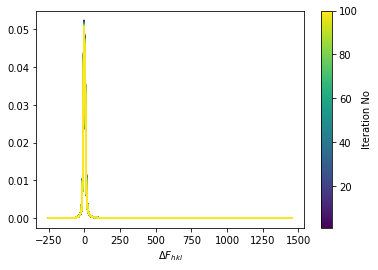

<Figure size 432x288 with 0 Axes>

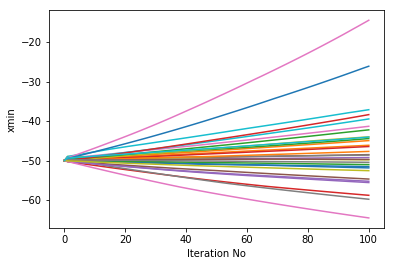

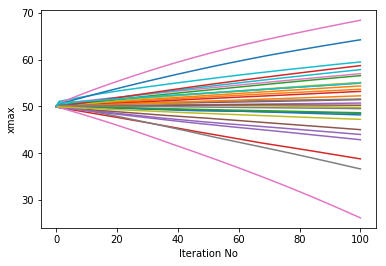

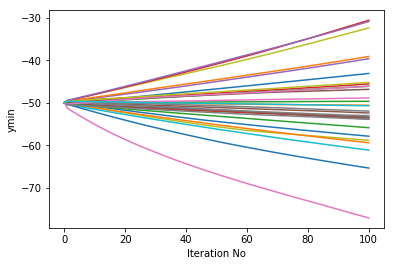

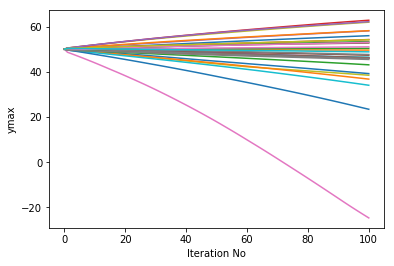

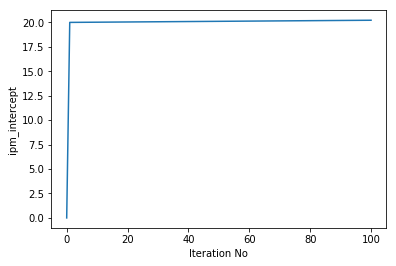

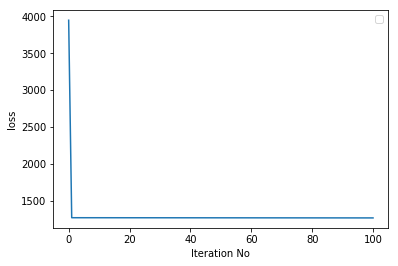

In [15]:
var_groups = {
    'IPM Slope'     : [ipm_slope, ipm_intercept],
    'Beam Shape'    : [sigx, sigy], 
    'Beam Position' : [x_slope, x_intercept, y_slope, y_intercept], 
    'Crystal Dimensions' : [xmin, xmax, ymin, ymax], 
}

#optimizers = {k:tf.train.AdagradOptimizer(1e-10).minimize(loss, var_list=v) for k,v in var_groups.items()}

#optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
optimizer = tf.train.AdagradOptimizer(20.).minimize(loss)
#optimizer = tf.train.AdadeltaOptimizer(5., 0.1).minimize(loss)
#optimizer = tf.keras.optimizers.SGD(0.1).minimize(loss)

tf.gradients


nsteps = 100
verbose=False
cmap = plt.get_cmap()
norm = plt.Normalize(vmin=1., vmax=nsteps)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array((1., nsteps))



logvars = {
    'xmin': xmin,
    'xmax': xmax,
    'ymin': ymin,
    'ymax': ymax,
    'Icryst': Icryst,
    'deltaF' : deltaF,
    'deltaFoverF' : deltaFoverF,
    'ipm_intercept' : ipm_intercept, 
    'loss' : loss,
    #'regularizer' : regularizer,
    #'absolute_deviation' : absolute_deviation,
}

L = {k:[] for k in logvars}
#L['loss'] = []
deltaF_ = None
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for k,v in logvars.items():
        L[k].append(sess.run(v))
    print("0: {}".format(L['loss'][-1]))
    for i in range(nsteps):
        _,loss_ = sess.run((optimizer, loss))
        for k,v in logvars.items():
            L[k].append(sess.run(v))
        if np.isnan(L['loss'][-1]):
            break
        #print("{}: {}".format(i+1, L['loss'][-1]))
        if (i + 1) % 10 == 0:
            print("{}: {}".format(i+1, L['loss'][-1]))
        deltaF_ = sess.run(deltaF)
        x1, x2  = deltaF_.min(),deltaF_.max()
        X = np.linspace(x1 - 0.1*(x2 - x1), x2 + 0.1*(x2 - x1), 200)
        plt.plot(X, gaussian_kde(deltaF_)(X), c=sm.to_rgba(i+1))
        
        

plt.colorbar(sm, ax=plt.gca(), label='Iteration No')
plt.xlabel('$\Delta F_{hkl}$')

plotvars = ['xmin', 'xmax', 'ymin', 'ymax', 'ipm_intercept', 'loss']

plt.figure()
for k in plotvars:
    v = L[k]
    plt.figure()
    plt.plot(v)
    plt.ylabel(k)
    plt.xlabel('Iteration No')
plt.legend()

Text(0,0.5,'$Crystal\\ \\hat X_{max}$')

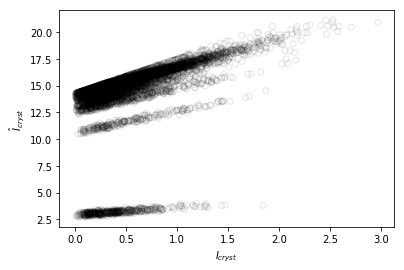

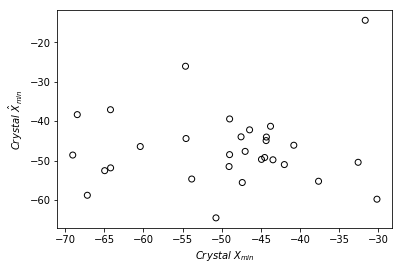

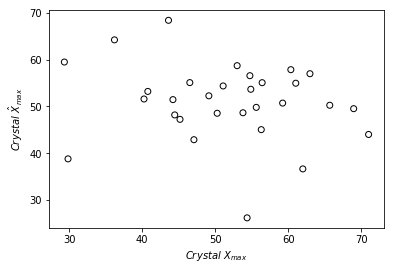

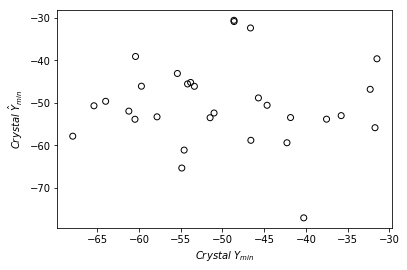

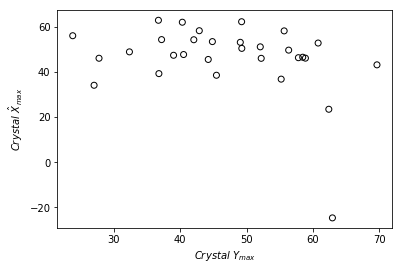

In [16]:
#How well is this doing at inferring parameters?
plt.scatter(I.groupby("IMAGEINDEX").mean()['Icryst'], L['Icryst'][-1], facecolors='none', edgecolors='k', alpha=0.1)
plt.xlabel(r"$I_{cryst}$")
plt.ylabel(r"$\hat I_{cryst}$")


plt.figure()
scatter(I.groupby("RUNINDEX").mean()['CRYSTLEFT'], L['xmin'][-1], facecolors='none', edgecolors='k')
plt.xlabel("$Crystal\ X_{min}$")
plt.ylabel("$Crystal\ \hat X_{min}$")

plt.figure()
scatter(I.groupby("RUNINDEX").mean()['CRYSTRIGHT'], L['xmax'][-1], facecolors='none', edgecolors='k')
plt.xlabel("$Crystal\ X_{max}$")
plt.ylabel("$Crystal\ \hat X_{max}$")

plt.figure()
scatter(I.groupby("RUNINDEX").mean()['CRYSTBOTTOM'], L['ymin'][-1], facecolors='none', edgecolors='k')
plt.xlabel("$Crystal\ Y_{min}$")
plt.ylabel("$Crystal\ \hat Y_{min}$")

plt.figure()
scatter(I.groupby("RUNINDEX").mean()['CRYSTTOP'], L['ymax'][-1], facecolors='none', edgecolors='k')
plt.xlabel("$Crystal\ Y_{max}$")
plt.ylabel("$Crystal\ \hat X_{max}$")

(-100, 100)

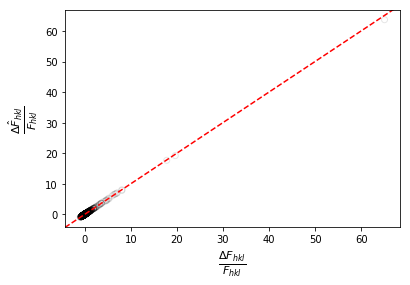

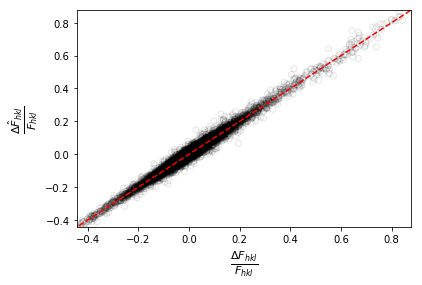

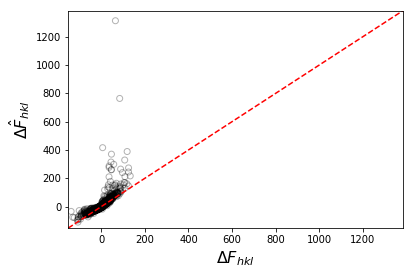

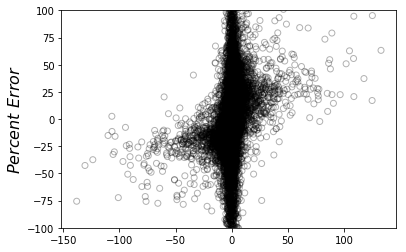

In [17]:
deltaF_ = L['deltaF'][-1]
deltaFoverF_ = L['deltaFoverF'][-1]

truegammas = np.array(I.groupby('GAMMAINDEX').mean()['gamma'])
trueFoff   = np.array(I.groupby('GAMMAINDEX').mean()['Foff'])
truedeltaF = trueFoff*(np.sqrt(truegammas) - 1)

#deltaF_estimate = trueFoff*deltaF_
deltaF_estimate = deltaF_

plt.scatter(truedeltaF/trueFoff, deltaFoverF_, edgecolors='k', facecolors='none', alpha=0.1)
plt.xlabel(r'$\frac{\Delta F_{hkl}} {F_{hkl}}$', fontsize=16)
plt.ylabel(r'$\frac{\Delta \hat F_{hkl}} {F_{hkl}}$', fontsize=16)
xlim = plt.xlim()
ylim = plt.ylim()
x = np.linspace(xlim[0], xlim[1], 100)
plt.plot(x, x, '--r')
plt.xlim(xlim)
plt.ylim(ylim)

plt.figure()
plt.scatter(truedeltaF/trueFoff, deltaFoverF_, edgecolors='k', facecolors='none', alpha=0.1)
plt.xlabel(r'$\frac{\Delta F_{hkl}} {F_{hkl}}$', fontsize=16)
plt.ylabel(r'$\frac{\Delta \hat F_{hkl}} {F_{hkl}}$', fontsize=16)
xlim = plt.xlim()
ylim = plt.ylim()
x = np.linspace(xlim[0], xlim[1], 100)
plt.plot(x, x, '--r')
plt.xlim(np.percentile(deltaFoverF_, 1), np.percentile(deltaFoverF_, 99))
plt.ylim(np.percentile(deltaFoverF_, 1), np.percentile(deltaFoverF_, 99))


plt.figure()
plt.scatter(truedeltaF, deltaF_, edgecolors='k', facecolors='none', alpha=0.3)
plt.xlabel(r'$\Delta F_{hkl} $', fontsize=16)
plt.ylabel(r'$\Delta \hat F_{hkl} $', fontsize=16)
xlim = plt.xlim()
ylim = plt.ylim()
xlim = ylim = (max(xlim[0], ylim[0]), max(xlim[1], ylim[1]))
x = np.linspace(xlim[0], xlim[1], 100)
plt.plot(x, x, '--r')
plt.xlim(xlim)
plt.ylim(ylim)

plt.figure()
x = np.sort(truedeltaF), 
y = (100.*(deltaF_ - truedeltaF)/truedeltaF)[np.argsort(truedeltaF)]
plt.scatter(np.sort(truedeltaF), (100.*(deltaF_estimate - truedeltaF)/truedeltaF)[np.argsort(truedeltaF)], color='k', facecolors='none', edgecolors='k', alpha=0.3)
plt.ylabel(r'$Percent\ Error$', fontsize=16)
plt.ylim(-100, 100)


In [18]:
outFN = "test/1ubq_deltaFestimate.hkl"
phaseFN = "test/1ubq.pdb.hkl"

from importlib import reload
import crystal
reload(crystal)

x = crystal.crystal().read_hkl(phaseFN)

H = np.array(I.groupby('GAMMAINDEX').mean()['MERGEDH'], dtype=int)
K = np.array(I.groupby('GAMMAINDEX').mean()['MERGEDK'], dtype=int)
L = np.array(I.groupby('GAMMAINDEX').mean()['MERGEDL'], dtype=int)

header = """{{ sg=P2(1)2(1)2(1) a=50.84 b=42.77 c=28.95 alpha=90 beta=90 gamma=90 }}
NREFlections={}
ANOMalous=FALSE
DECLare NAME=FOBS DOMAin=RECIprocal TYPE=COMPLEX END
""".format(len(deltaF_estimate))

with open(outFN, 'w') as out:
    out.write(header)
    for h,k,l,f in zip(H, K, L, deltaF_estimate):
        p = x.loc[h, k, l]['PHASE']
        out.write("INDE {} {} {} FOBS= {} {}\n".format(h,k,l,f,p))